<div style="display: flex; align-items: center;">
    <div style="display: flex; flex-direction: column; align-items: center;">
        <h1 style="text-align: right;">Centro de Investigación en Matemáticas, A.C.</h1>
        <h2 style="text-align: right;">Reconocimiento de Patrones</h2>
        <h3 style="text-align: right;">Tarea 3</h3>
    </div>
    <img src="Figures\logoCIMAT11.png" alt="CIMAT Logo" width="200" style="float: left;">
</div>


---

**Pregunta 2**

- ¿Cuál método es más robusto a datos atípicos: k-medias o agrupamiento aglomerativo? ¿De qué depende? Integra en tu respuesta algunos ejemplos didácticos apoyados con unas gráficas informativas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns;
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

np.random.seed(2025)

Los dos métodos son sensibles a datos atípicos. Sin embargo, el método de agrupamiento jerárquico es sensible a datos atípicos que k-medias no es, mientras que los datos atípicos a los que k-medias es sensible también afectan al agrupamiento jerárquico. Para ejemplificar, generamos datos de dos bivariadas normales:

In [2]:
# Create two DataFrame objects with normal distributions of x and y coordinates
df1 = pd.DataFrame({'x':np.random.normal(-10, 1, 200),
                    'y': np.random.normal(-10, 1, 200)})

df2 = pd.DataFrame({'x':np.random.normal(10, 1, 200),
                    'y': np.random.normal(10, 1, 200)})

# Create a list of DataFrame objects to be concatenated
frames = [df1, df2]

# Concatenate the DataFrame objects into a single DataFrame
data = pd.concat(frames)

Podemos ver que naturalmente estos datos se pueden clasificar en dos grupos:

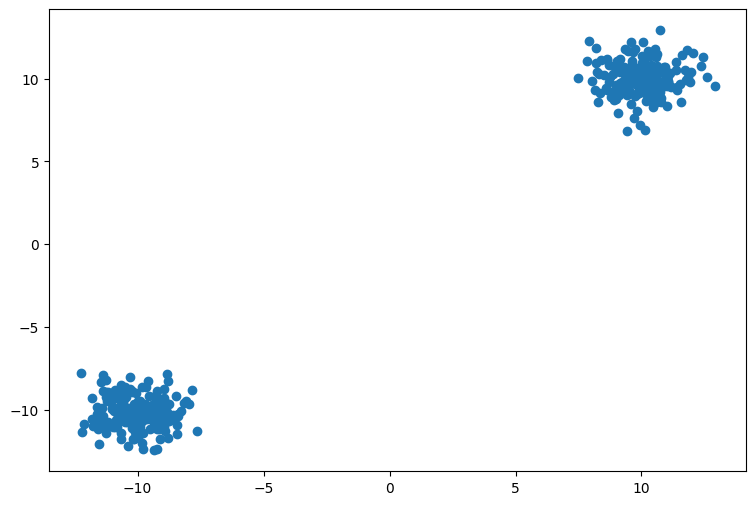

In [3]:
# Create a scatter plot of x and y data
plt.figure(figsize=(9, 6)) # Set figure size to 9x6 inches
plt.scatter(data['x'], data['y']) # Scatter plot of x vs. y coordinates
plt.show()

Utilizamos linkage para hacer agrupamiento aglomerativo:

Para saber en cuál grupo una observación queda al cortar tal que el número de grupos es igual a lo que uno especifica:

In [4]:
# Compute the linkage matrix using the single method and Euclidean metric
linkage_data = linkage(data, method='single', metric='euclidean')

# Use the cut_tree function to assign each data point to a cluster based on the linkage matrix
# The n_clusters parameter specifies the number of clusters to create
h_cluster_id = cut_tree(linkage_data, n_clusters=2)

Vemos que el agrupamiento obtenido es el correcto:

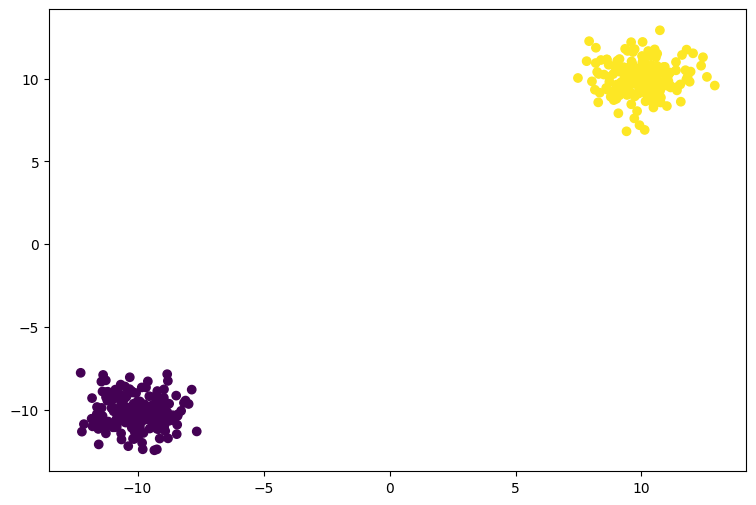

In [5]:
# Create a scatter plot of x and y data grouped by linkages
plt.figure(figsize=(9, 6))
plt.scatter(data['x'],data['y'], c=h_cluster_id)
plt.show()

Ahora, utilizamos k-means para agrupar los mismos datos.

In [6]:
# Create an instance of the KMeans class with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the k-means model to the data and assign labels to each point in the dataset
labels = kmeans.fit_predict(data)

Vemos que los datos nuevamente se agrupan correctamente. La estrella roja marca el centroide:

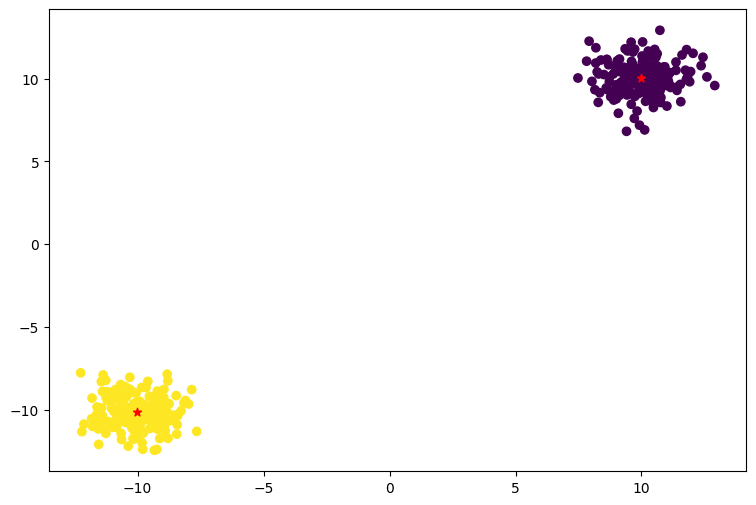

In [7]:
# Create a scatter plot of x and y data grouped by k-means
plt.figure(figsize=(9, 6))
plt.scatter(data['x'],data['y'], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red',marker='*')
plt.show()

Para iniciar, añadimos dos outliers:

In [8]:
# Add an outlier at the end of the dataset

theta = np.random.normal(np.pi/4,np.pi/16,2)
r = np.random.normal(60,5,2)

outlier_data = pd.DataFrame({'x': r*np.cos(theta), 'y': r*np.sin(theta)})

# Append the outlier to the original dataframe
sample_1 = pd.concat([data, outlier_data], ignore_index=True)

In [9]:
# Apply k-means clustering to the data with outliers
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(sample_1)

# Compute hierarchical linkage of the sample data using the 'complete' method and Euclidean metric
linkage_data_1 = linkage(sample_1, method='complete', metric='euclidean')

# Cut the hierarchical tree into two clusters based on the computed linkage data
h_cluster_id = cut_tree(linkage_data_1, n_clusters=2)

Vemos que k-medias continúa separando los grupos:

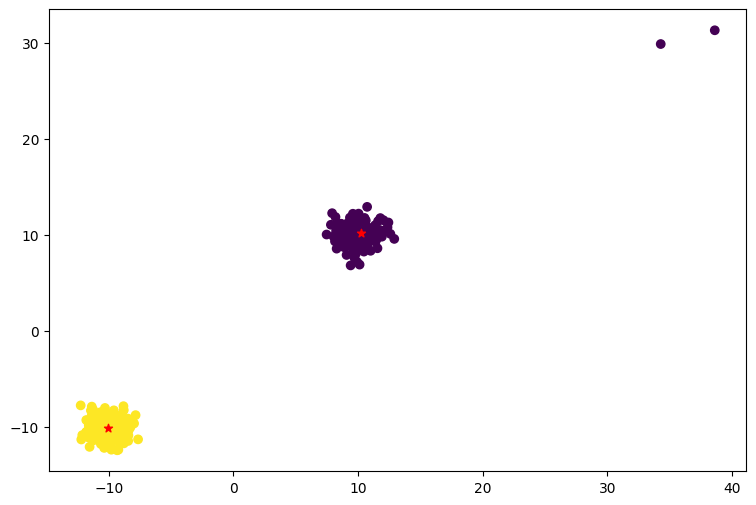

In [10]:
# Create a scatter plot of x and y data with outliers grouped using k-means
plt.figure(figsize=(9, 6))
plt.scatter(sample_1['x'], sample_1['y'], c = labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red',marker='*')
plt.show()

Sin embargo, agrupamiento aglomerativo clasifica por un lado los outliers y por otro los datos originales.


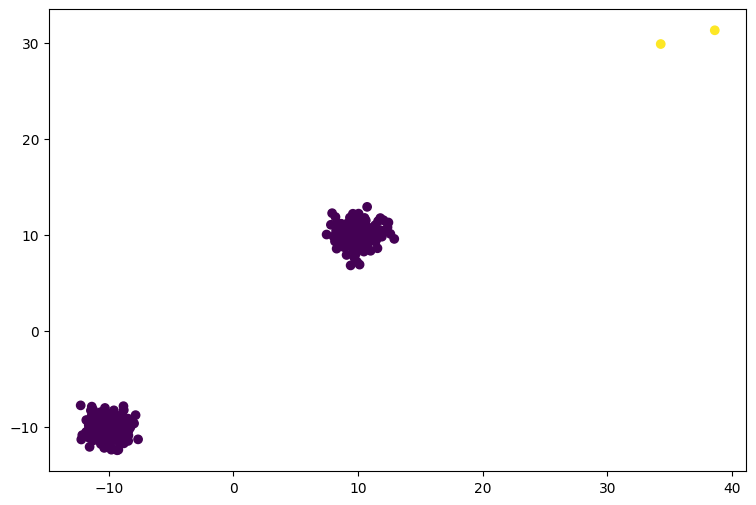

In [11]:
# Create a scatter plot of x and y data with outliers grouped using hierarchical clustering
plt.figure(figsize=(9, 6))
plt.scatter(sample_1['x'],sample_1['y'], c=h_cluster_id)
plt.show()

Veamos ahora que esto no significa que k-medias sea infalible. Incrementemos la distancia de los grupos a los outliers:

In [12]:
# Add outliers at the end of the dataset

theta = np.random.normal(np.pi/4,np.pi/16,2)
r = np.random.normal(500,5,2)

outlier_data = pd.DataFrame({'x': r*np.cos(theta),
                    'y': r*np.sin(theta)})

# Append the outlier to the original dataframe
sample_1 = pd.concat([data, outlier_data], ignore_index=True)

In [13]:
# Create an instance of KMeans with n_clusters=2 to divide the data into 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the sample_1 dataset and predict labels for each point in the dataset
labels = kmeans.fit_predict(sample_1)

# Perform hierarchical clustering on the sample_1 dataset using 'complete' linkage method and 'euclidean' distance metric
linkage_data_1 = linkage(sample_1, method='complete', metric='euclidean')

# Use cut_tree to determine which cluster each point belongs to based on the hierarchical clustering result
h_cluster_id = cut_tree(linkage_data_1, n_clusters=2)

En este caso, k-medias falla:

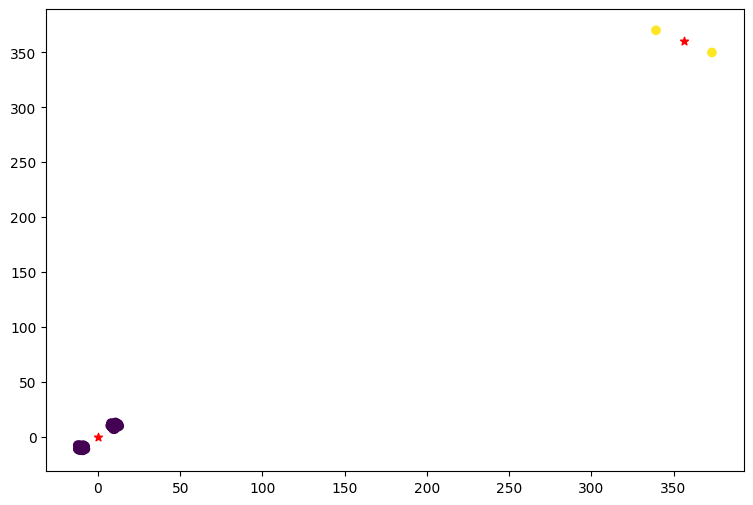

In [14]:
# Create a scatter plot of x and y data with outliers grouped using k-means
plt.figure(figsize=(9, 6))
plt.scatter(sample_1['x'], sample_1['y'], c = labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red',marker='*')
plt.show()

Al igual que agrupamiento aglomerativo:


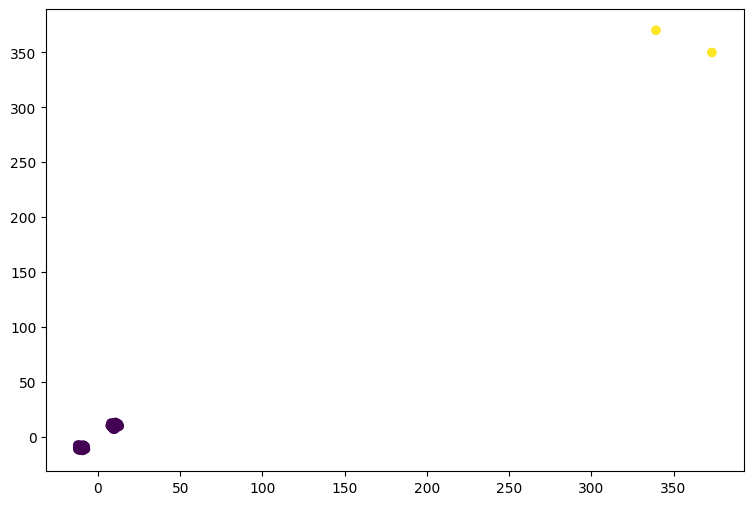

In [15]:
# Create a scatter plot of x and y data with outliers grouped using hierarchical clustering
plt.figure(figsize=(9, 6))
plt.scatter(sample_1['x'],sample_1['y'], c=h_cluster_id)
plt.show()

A continuación presentamos otro ejemplo donde k-medias clasifica correctamente y agrupamiento jerárquico no:

In [16]:
# Create the outlier data
theta = np.random.normal(0, np.pi, 20)  # Random angle
r = np.random.normal(50, 10, 20)  # Random radius (large to create an outlier)

new_data = pd.DataFrame({
    'x': r * np.cos(theta),  # Convert polar to Cartesian coordinates
    'y': r * np.sin(theta)
})

sample_2 = pd.concat([data, new_data], ignore_index=True)

In [17]:
# Create a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2)
# Fit the model to the sample data and get the cluster labels
labels = kmeans.fit_predict(sample_2)

# Create a linkage matrix using the average method and Euclidean distance
linkage_data_2 = linkage(sample_2, method='average', metric='euclidean')

# Use cut_tree to assign hierarchical clustering labels to each observation
h_cluster_id = cut_tree(linkage_data_2, n_clusters=2)

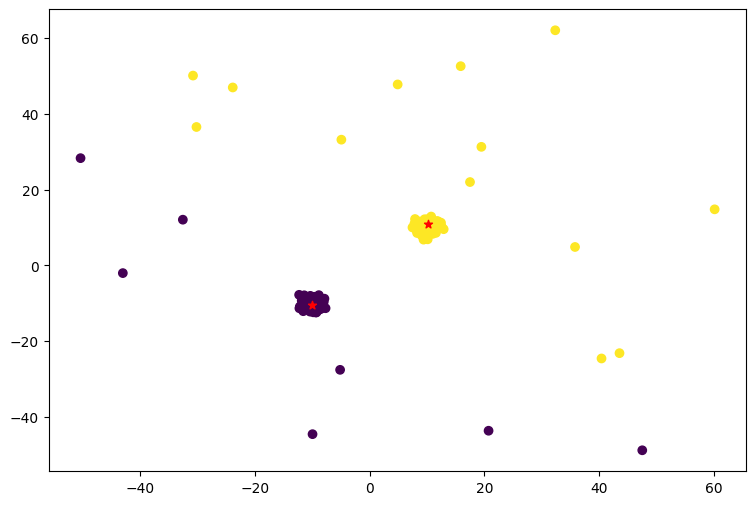

In [18]:
# Create a scatter plot of x and y data with outliers grouped using k-means
plt.figure(figsize=(9, 6))
plt.scatter(sample_2['x'],sample_2['y'], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red',marker='*')
plt.show()

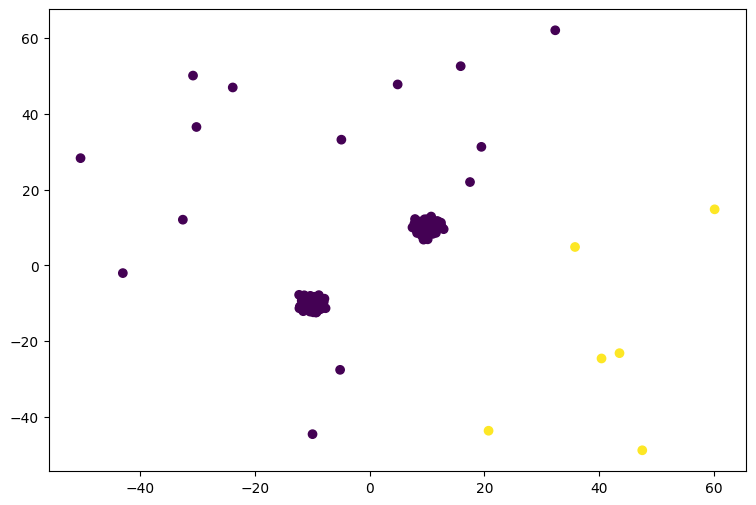

In [19]:
# Create a scatter plot of x and y data with outliers grouped using hierarchical clustering
plt.figure(figsize=(9, 6))
plt.scatter(sample_2['x'],sample_2['y'], c=h_cluster_id)
plt.show()

Parece que k-medias falla cuando los datos atípicos modifican la media del cluster más cercano, lo que requiere una gran cantidad de datos atípicos o datos con valores muy atípicos para un conjunto de datos de tamaño mediano o grande.

Por otro lado, se requiere que la distancia entre los datos atípicos y los clusters sea mayor que la distancia entre dos clusters, sin importar cuál distancia estemos tomando(single, average o complete linkage).

**Pregunta 3**

- Supongamos que en agrupamiento jerárquico aplicamos una función monótona creciente a las distancias entre las observaciones que usamos como punto de partida. Por ejemplo, usamos $d^2_{i;j}$ en lugar de $d_{i;j}$.
Discute: ¿van a cambiar los resultados de single, average y complete linkage?

Una función monótona creciente no debe afectar a los resultados para single y complete linkages, simplemente puede que en el dendograma, las distancias de corte resulten más cercanas o lejanas. Primero, veamos que para el single linkage:
$$
D(A,B) = \min_{a\in A, b \in B}d(a,b)\\
D(A,B) = \min_{a\in A, b \in B}d(a,b) \leq \min_{x \in X, y \in Y}d(x,y) = D(X,Y)
$$
Para cualquier otro agrupamiento $X,Y$. Una vez que $f$ es monótona creciente, preserva la desigualdad.
$$
\min_{a\in A, b \in B} f(d(a,b)) \leq \min_{x \in X, y \in Y} f(d(x,y))\\
D_f(A,B) \leq D_f(X,Y)
$$

Para complete linkage,
$$
D(A,B) = \max_{a\in A, b \in B}d(a,b)\\
D(A,B) = \max_{a\in A, b \in B}d(a,b) \leq \max_{x \in X, y \in Y}d(x,y) = D(X,Y)
$$
Para cualquier otro agrupamiento $X,Y$. Una vez que $f$ es monótona creciente, preserva la desigualdad.
$$
\max_{a\in A, b \in B} f(d(a,b)) \leq \max_{x \in X, y \in Y} f(d(x,y))\\
D_f(A,B) \leq D_f(X,Y)
$$

Si tomamos el mismo razonamiento para average linkage:

$$
D(A, B) = \frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B} d(a, b) \leq \frac{1}{|X||Y|} \sum_{x \in X} \sum_{y \in Y} d(x,y) = D(X,Y)
$$

Podemos asegurar:
$$
f\left(\frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B} d(a, b)\right) \leq f\left(\frac{1}{|X||Y|} \sum_{x \in X} \sum_{y \in Y} d(x,y)\right)
$$
Sin embargo no podemos asegurar que la suma de las nuevas distancias preserve la desigualdad.

A pesar de esto, no he encontrado un ejemplo en el que no se preserven las desigualdades.

**Pregunta 4**

Supongamos que para un problema de clasificación binaria, se construye un clasificador donde se permite, además de regresar como predición 0 y 1, también abstenerse.

El costo de predecir $1$ si la verdadera categoria es $0$, es $1$ peso. El costo de predecir $0$ si la verdadera categoria es $1$, también es $1$ peso. El costo de abstenerse es $\theta$, una constante dada de antemano: $0 < \theta < \frac{1}{2}$.

Calcula el clasificador Bayesiano óptimo en función de $\theta$ y $\mathbb{P}(Y = 1\mid X = x)$.

Para encontrar el clasificador Bayesiano óptimo en función de $\theta$ y $p := \mathbb{P}(Y = 1\mid X = x)$, debemos minimizar:

$$
\sum_{x} \mathbb{E} \left[ L(Y,\hat{Y}(x)) \mid X=x \right] \mathbb{P}(X=x)
$$
Nótese que
$$
\mathbb{E} \left[ L(Y,\hat{Y}(x)) \mid X=x \right] = \mathbb{P}(Y=1\mid X=x) = p
$$
Mientras que en el caso que $\hat{Y}(x)=1$
$$
\mathbb{E} \left[ L(Y,\hat{Y}(x)) \mid X=x \right] = \mathbb{P}(Y=0\mid X=x) = 1-p
$$
Finalmente, en el caso de abstenerse,
$$
\mathbb{E} \left[ L(Y,\hat{Y}(x)) \mid X=x \right] = \theta
$$

Entonces, el clasificador bayesiano óptimo es:

$$
\hat{Y}(x) = \begin{cases}
0, & p \leq \min\{ 1 - p, \theta\} \\
1, & 1-p \leq \min\{ p, \theta\}\\
\text{abstenerse}, & \theta < \min\{p,1-p\}
\end{cases}





**Pregunta 5**

Supongamos que $X,Y$ sean v.a. discretas:
|     |  $X=0$ |  $X=1$ |  $X=2$ |
|:---:|:----:|:----:|:----:|
| $Y=0$ |  0.1 |  0.3 | 0.25 |
| $Y=1$ | 0.25 | 0.05 | 0.05 |

Si $L(0,1)=L(1,0)$, calcula el clasificador Bayesiano óptimo de $Y$ usando $X$.

Si $L(0, 1) = 2L(1, 0)$ calcula el clasificador Bayesiano óptimo y su error (promedio) correspondiente.

Primero, supongamos que $L(0,1)=L(1,0)$. Recordemos que, en este caso, el clasificador bayesiano óptimo para este problema está dado por:
$$
\mathbf{1}\left( \frac{\mathbb{P}(Y=1\mid X=x)}{\mathbb{P}(Y=0\mid X=x)} > 1\right)
$$
De forma que el clasificador bayesiano óptimo para el problema es:
$$
\hat{Y}(x)=\begin{cases}
1, & x = 0\\
0, & x = 1\\
0, & x=2
\end{cases}
$$

Ahora, si $L(0,1)=2L(1,0)$, el clasificador bayesiano óptimo está dado por:
$$
\mathbf{1}\left( \frac{\mathbb{P}(Y=1\mid X=x)}{\mathbb{P}(Y=0\mid X=x)} > 2\right)
$$
El clasificador bayesiano óptimo es el mismo que antes:
$$
\hat{Y}(x)=\begin{cases}
1, & x = 0\\
0, & x = 1\\
0, & x=2
\end{cases}
$$

El error promedio esperado en este caso es:
$$
\mathbb{E}\left[L(Y,\hat{Y}(x))\right] = \sum_{x} \mathbb{E} \left[ L(Y,\hat{Y}(x)) \mid X=x \right] \mathbb{P}(X=x)\\
\mathbb{E}\left[L(Y,\hat{Y}(x))\right] = L(0,1) \frac{0.1}{\mathbb{P}(X=0)}\mathbb{P}(X=0) + L(1,0) \frac{0.05}{\mathbb{P}(X=1)}\mathbb{P}(X=1) + L(1,0) \frac{0.05}{\mathbb{P}(X=2)}\mathbb{P}(X=2)
\mathbb{E}\left[L(Y,\hat{Y}(x))\right] = 0.3 L(1,0)
$$

**Pregunta 6**

Haz un análisis de agrupamiento para los datos sat.csv. Se trata de los resultados de pruebas psicométricas de 700 personas.

Importamos la base de datos, quitamos los datos faltantes y normalizamos las variables:

In [20]:
# Load the 'sat.csv' file into a DataFrame, using the first column as the index
sat = pd.read_csv('sat.csv', index_col=0)

# Drop any rows with missing values from the DataFrame
sat = sat.dropna()

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Extract all numeric columns from the 'sat' DataFrame
numeric_columns = sat.columns

# Fit and transform the scaled data using the standard scaler
scaled_data = scaler.fit_transform(sat)

# Convert the scaled data back to a DataFrame with appropriate column names
sat = pd.DataFrame(scaled_data, columns=numeric_columns)

Para el análisis de agrupamiento, tomaremos la matriz de distancias:

In [21]:
# Compute row-wise distances between points in 'sat' matrix using Euclidean metric
row_distances = pdist(sat, metric='euclidean')

# Compute column-wise distances (correlation) between columns in 'sat' matrix
col_distances = pdist(sat.T, metric='correlation')


Hacemos el análisis de agrupamiento y vemos el clustermap:

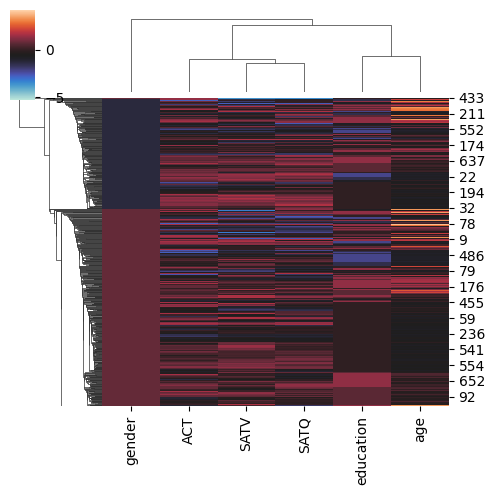

In [22]:
# Define the linkage method for the hierarchical clustering algorithm
link_fun = 'single'

# Perform hierarchical clustering on rows using the defined linkage method
row_link = linkage(row_distances, method = link_fun)

# Perform hierarchical clustering on columns using the defined linkage method
col_link = linkage(col_distances, method = link_fun)

# Create a clustermap visualization of the satellite data
g = sns.clustermap(sat, row_linkage=row_link, col_linkage=col_link, figsize=(5,5), cmap='icefire')


Notamos que el mayor agrupamiento lo hace por el género, después por la educación y la edad, y finalmente por los resultados psicométricos. Si bien, esto no es muy informativo, aprendemos que podemos clasificar las variables en tres grupos: resultados de la prueba, edad y educación, y género.

Ahora, hagámos un análisis de componentes principales para ver si podemos obtener un mejor agrupamiento:


In [23]:
# Perform PCA to reduce data to 2 dimensions
pca = PCA(2)
pca_data = pca.fit_transform(sat)

# Create a hierarchical clustering linkage matrix using complete linkage method
pca_link = linkage(pca_data[:,:2], method = 'complete')

# Use the linkage matrix to create cluster labels
pca_labels = cut_tree(pca_link, n_clusters=2)


Modificamos la función my_plot proporcionada para que pueda mostrar los puntos con colores distintos dependiendo del agrupamiento.

In [24]:
def myplot(score,coeff,var_labels=None, points_labels=None):
    # xs and ys are the first two principal components of the score matrix
    xs = score[:,0]
    ys = score[:,1]

    # n is the number of variables in the original data set
    n = coeff.shape[0]

    # scalex and scaley are used to normalize the scores so they fit within a unit square for plotting
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    # Initialize the figure
    plt.figure(figsize=(9, 6))

    # If no points_labels are provided, scatter plot all the scores using different colors
    if points_labels is None:
        plt.scatter(xs * scalex, ys * scaley, cmap='rainbow')
    else:
        # If points_labels are provided, scatter plot the scores using different colors based on their labels
        plt.scatter(xs * scalex, ys * scaley, c=points_labels, cmap='rainbow')

    # Loop through each variable in the original data set and draw an arrow pointing to its corresponding principal component
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)

        # If no var_labels are provided, label each principal component with the variable it corresponds to
        if var_labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            # If var_labels are provided, label each principal component with the variable name
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, var_labels[i], color = 'g', ha = 'center', va = 'center')

    # Set the x and y limits of the plot to be within a unit square for better visualization
    plt.xlim(-1,1)
    plt.ylim(-1,1)

    # Label the axes with "PC{}".format(1) and "PC{}".format(2)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))

    # Show a grid on the plot for better readability
    plt.grid()

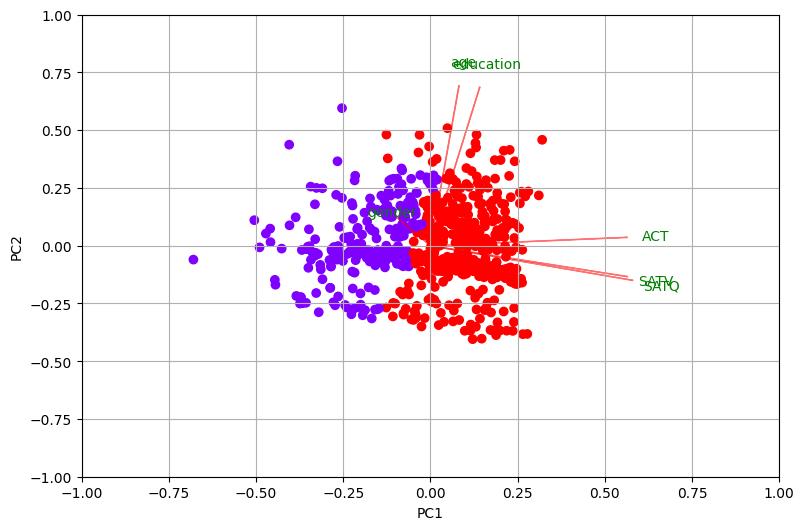

In [25]:
myplot(pca_data[:,0:2], np.transpose(pca.components_[0:2, :]), var_labels = sat.columns.values, points_labels=pca_labels.flatten())

Vemos que, como era de esperarse, el análisis PCA arroja la variable de mayor varianza a los resultados de las pruebas SAT, mientras que la segunda variable de mayor varianza se relaciona con la edad y los años de educación. El agrupamiento jerárquico agrupa los datos por el resultado en las pruebas SAT: en general, los primeros tienen bajo rendimiento y el resto alto rendimiento, aunque algunos de mayor educación también se encuentran en el segundo grupo a pesar de su rendimiento menor que el promedio.